# Visualização de Dados - IBM - Coursera


Semana 1: Introdução às ferramentas de visualização de dados

Por que visualizar dados?
* Análise exploratória dos dados
* Comunicação clara dos dados
* Representação não enviesada dos dados
* Usar dados como suporte a recomendações às diferentes partes envolvidas


[DarkHorse Analytics](darkhorseanalytics.com) - Consultoria - Alberta University/US (2008)
* Pilares da visualização de dados
    * Less is more effective
    * Less is more atractive
    * Less is more impactive

## Matplotlib
* Criada pelo neurobiologista John Hunter (1968-2012)
    * Análise de Eletrocorticografia (ECoG) 
* Instalação
    * $ pip3 install matplotlib
* Arquitetura
    * Backend Layer ( FigureCanvas, Renderer, Event)
    * Artist Layer (Artist)
    * Scripting Layer (pyplot)

Fonte: [The Architecture of Open Source Applications - Matplotlib](http://aosabook.org/en/matplotlib.html)

### Plot function

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

Plotando um marcador circular na posição (5,5)

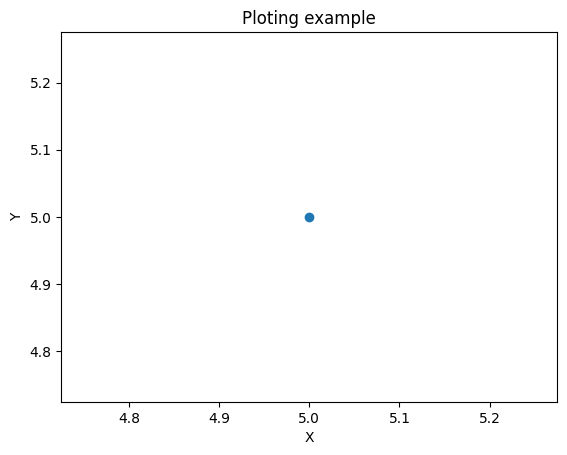

In [35]:
plt.plot(5,5,'o')
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Ploting example")
plt.show()

Utilizando matplotlib com um Pandas dataframe 

In [36]:
import pandas as pd

In [61]:
# Atribuir dados em lista
data = {''     : [1980,1981,1982,1983,1984],
        'India': [8880,8670,8147,7338,5704], 
        'China': [5123,6682,3308,1863,1527]}

In [62]:
# Criando o DataFrame
india_china_df = pd.DataFrame(data)
india_china_df

,,India,China
0,1980,8880,5123
1,1981,8670,6682
2,1982,8147,3308
3,1983,7338,1863
4,1984,5704,1527


In [63]:
india_china_df.set_index('', inplace=True)
india_china_df

,India,China
,,
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


Plotando gŕafico de linha

<AxesSubplot: xlabel='Ano'>

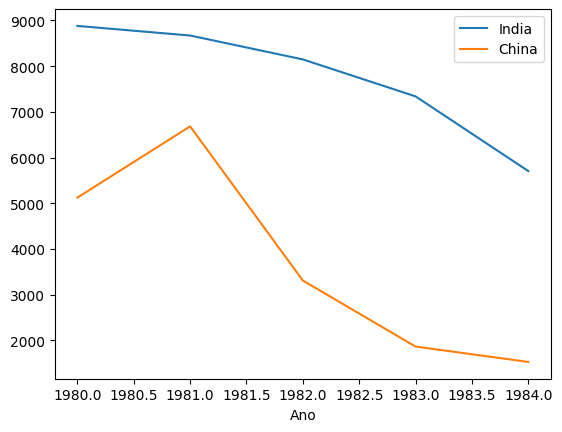

In [60]:
india_china_df.plot(kind="line")

Plotando histograma

<AxesSubplot: ylabel='Frequency'>

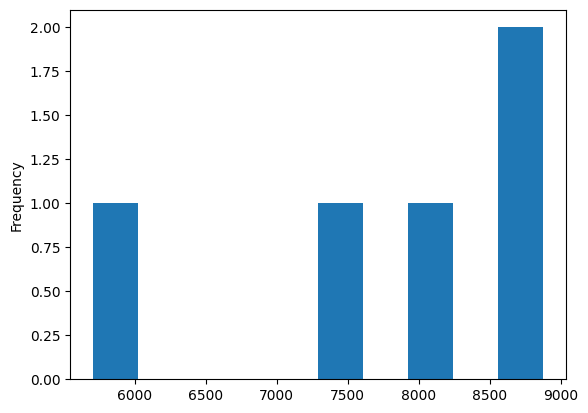

In [64]:
india_china_df['India'].plot(kind="hist")

## Lendo dados de um dataframe Pandas

In [ ]:
#df_can = pd.read_excel()

Semana 2: Ferramentas de visualização básicas e avançadas

Semana 3: Visualizações avançadas e dados geoespaciais